In [1]:
from torchvision.datasets import CIFAR10

# load training data
train_data = CIFAR10(root = './train/',
                     train = True,
                     download = True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./train/cifar-10-python.tar.gz to ./train/


In [2]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./train/
    Split: Train

In [4]:
train_data.data.shape

(50000, 32, 32, 3)

In [8]:
train_data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [9]:
train_data.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [11]:
data, label = train_data[0]

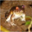

In [12]:
data

In [13]:
label

6

In [14]:
train_data.classes[label]

'frog'

In [ ]:
# load testing data
test_data = CIFAR10(root = './test/',
                    train = False,
                    download = True)

  0%|          | 0/170498071 [00:00<?, ?it/s]